# [Perceval](https://perceval.quandela.net/docs/)

Perceval est la plateforme logicielle de Quandela, permettant le développement de circuit et algorithme sur ordinateur photonique.

In [2]:
import perceval as pcvl
import numpy as np
from perceval.components import catalog
from perceval.components.source import Source
from perceval.algorithm import ProcessTomography
from perceval.algorithm.tomography import is_physical

Ici, nous utilisons Perceval pour réaliser une opérations cnot sur deux photons. Dans la technologie de l'ordinateur Quandela, la réalisation d'une porte CNOT se fait grâce au protocole KLM.

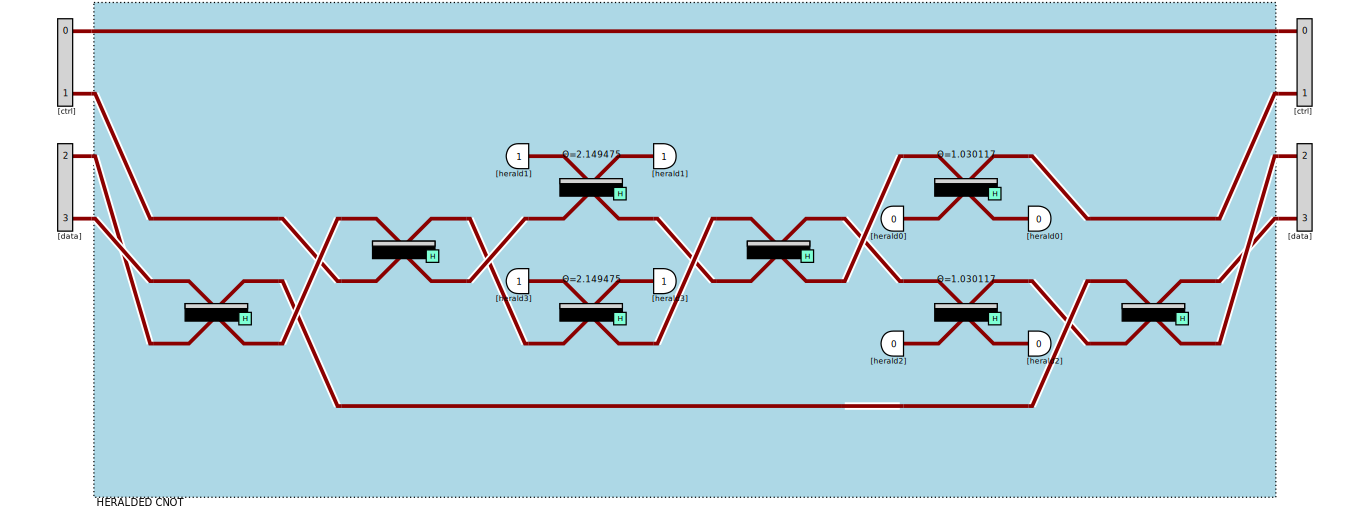

In [3]:
cnot = catalog["klm cnot"].build_processor()
pcvl.pdisplay(cnot, recursive=True)

Nous pouvons vérifier que le circuit réalise bien les opérations correspondant à une porte CNOT.

In [6]:
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(cnot, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)
print(f"performance = {pcvl.simple_float(ca.performance)[1]}, fidelity = {ca.fidelity*100}%")



,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


performance = 0.051321, fidelity = (100+0j)%
